In [2]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [3]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!

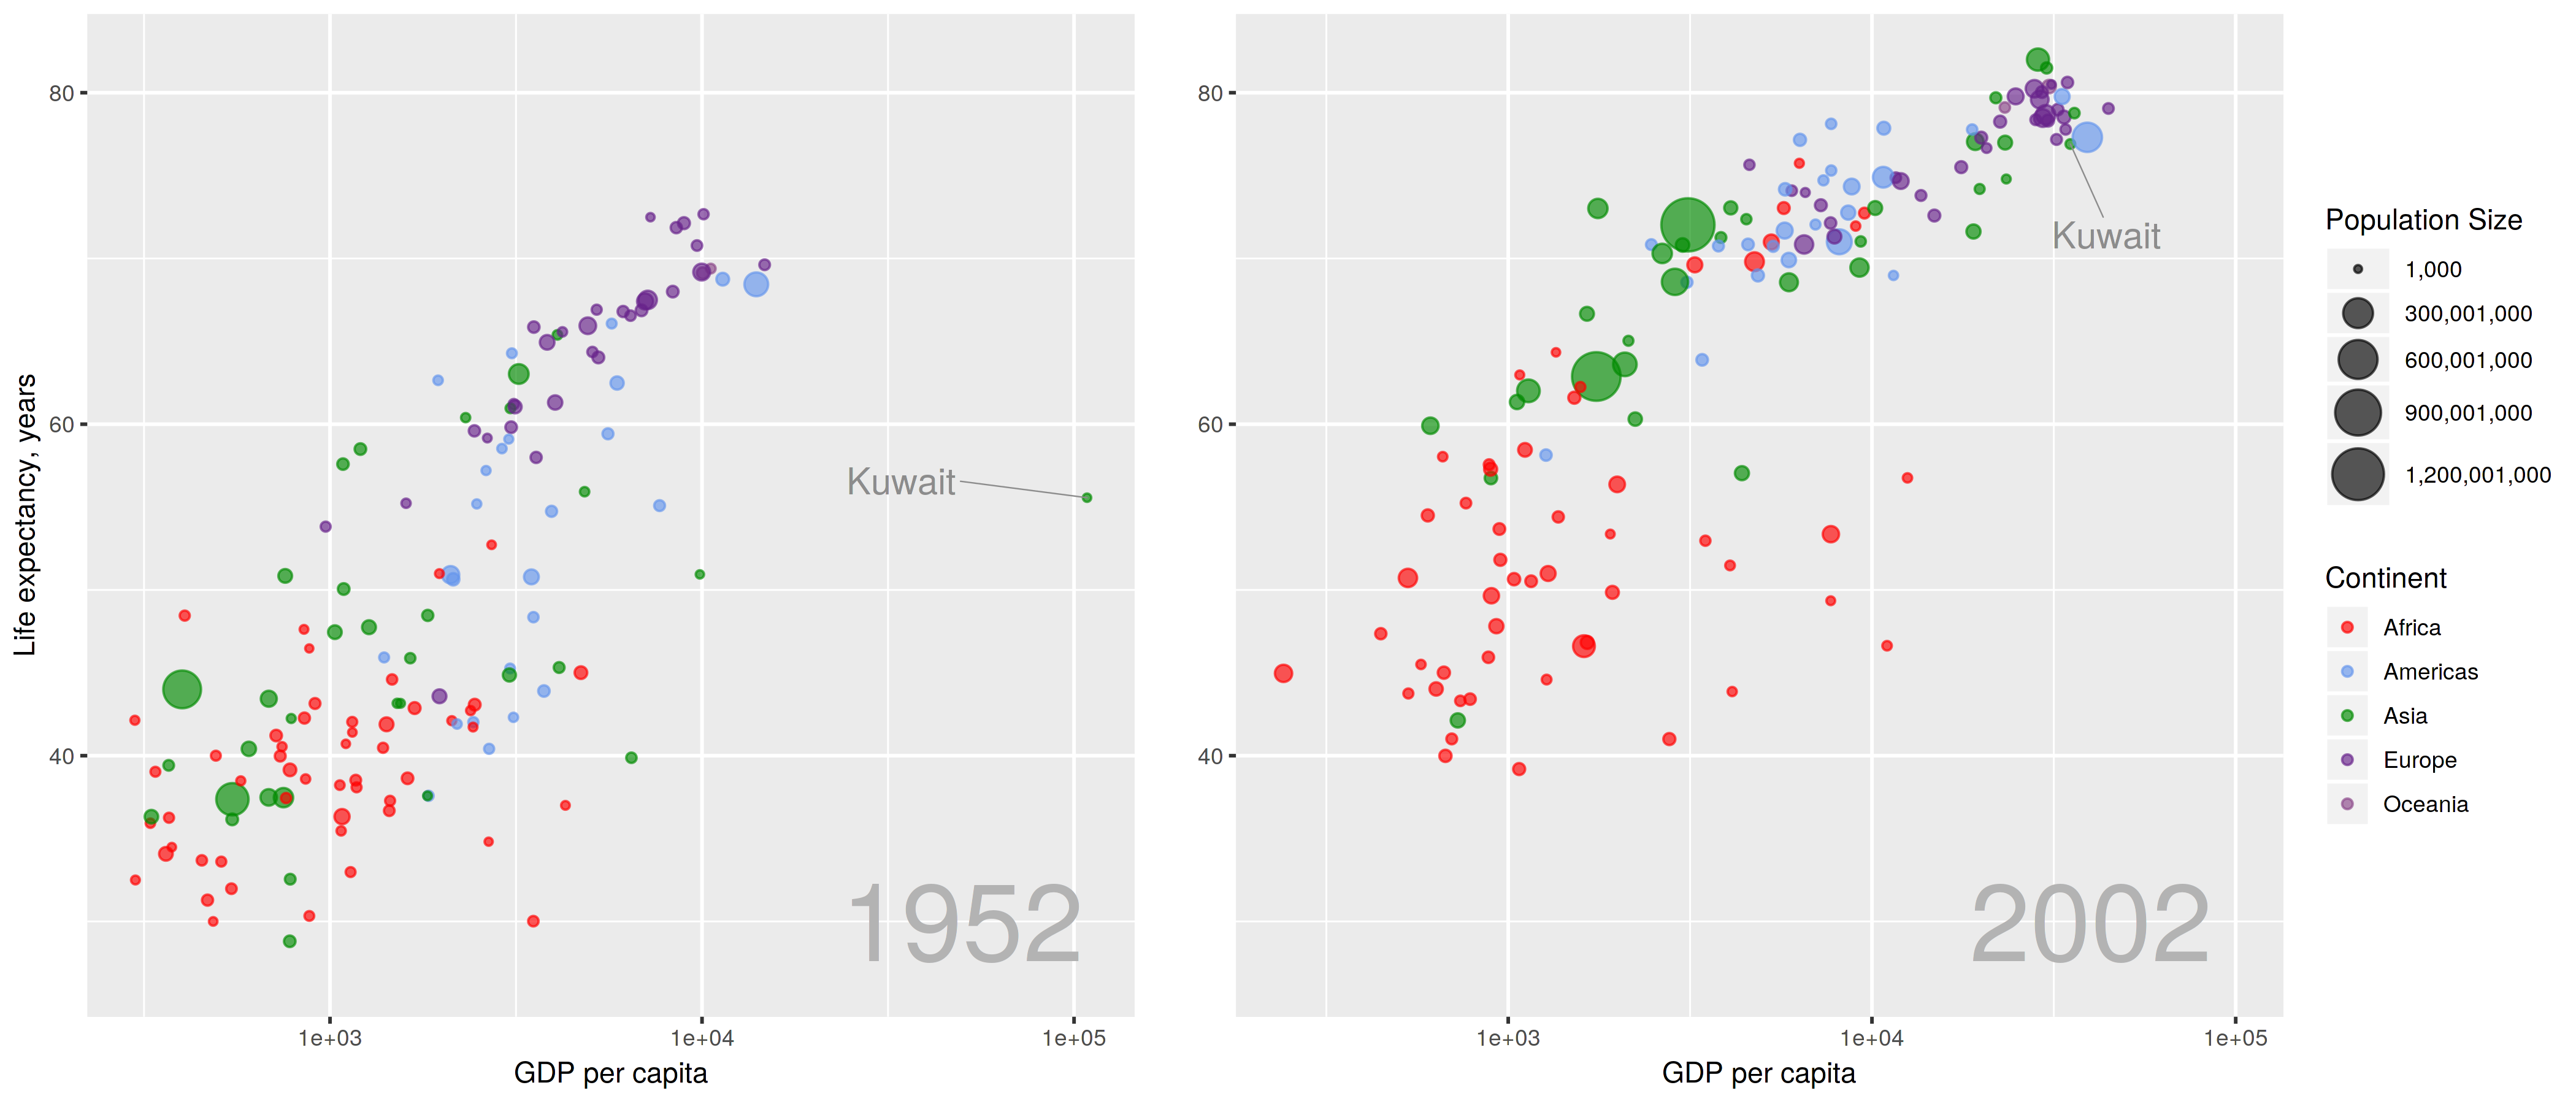

In [15]:

options(repr.plot.res = 300, repr.plot.height = 6, repr.plot.width = 14)

p = ggplot(df.1952, aes(x = gdpPercap, y = lifeExp, color=continent)) + geom_point(aes(size=pop),show.legend=FALSE, alpha=0.65) + xlab("GDP per capita") + ylab("Life expectancy, years") + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), limits = c(1e+4, 1.5e+9),range = c(1, 10), labels = scales::comma) + ylim(c(27, 82)) + scale_x_log10()

gapminder_filtered = df.1952 %>% filter(country == 'Kuwait')

p = p + geom_text_repel(data= gapminder_filtered,nudge_y = 1,nudge_x = -0.5,segment.size = 0.2, size = 5,segment.color = "grey55",aes(label = country), show.legend = FALSE, color="grey55")+ scale_color_manual(values = c('red1', 'cornflowerblue', 'green4', 'darkorchid4','orchid4')) + annotate("text", x = 50000, y = 30, label = "1952", size =15, color="grey70")


p2 = ggplot(df.2002, aes(x = gdpPercap, y = lifeExp, color=continent)) + geom_point(aes(size=pop), alpha=0.65) + labs(color="Continent") + labs(size ="Population Size")+ xlab("GDP per capita")
p2 = p2 + ylab(" ")+ scale_size(breaks = seq(1e+3, 1.5e+9, 3e+8), limits = c(1e+3, 1.5e+9),range = c(1, 10), labels = scales::comma)+ ylim(c(27, 82))+ scale_x_log10()
gapminder_filtered = df.2002 %>% filter(country == 'Kuwait')

p2 = p2 + geom_text_repel(data= gapminder_filtered,nudge_y = -5.5,nudge_x = 0.1,segment.size = 0.2,size = 5,segment.color = "grey55",aes(label = country), show.legend=FALSE, color="grey55") + scale_color_manual(values = c('red1', 'cornflowerblue', 'green4', 'darkorchid4','orchid4'))
p2 = p2 + annotate("text", x = 1e+5, y = 30,label = "", size =15, color="grey")
p2 = p2 + annotate("text", x = 4e+4, y = 30,label = "2002", size =15, color="grey70")

p + p2